In [1]:
import gpxpy

import pandas as pd

import matplotlib

from pytz import timezone

from utils import (
    init_postgis, 
    get_location_error, 
    crop_route, 
    get_total_distance,
    get_gpx_df,
    plot_map,
    plot_location_error,
    plot_elevation,
)

In [2]:
matplotlib.rcParams['timezone'] = 'Asia/Bangkok'

In [3]:
input_dir = f"../hanoi/times-city"

In [4]:
init_postgis('gpx_route', input_dir + '/route.gpx')
init_postgis('glonass', input_dir + '/glonass.gpx')
init_postgis('galileo', input_dir + '/galileo.gpx')

In [5]:
glonass_df = get_location_error('glonass')
glonass_df.head(3)

,time,lat,lon,distance_to_route
0,2024-09-06 22:32:02.979000+08:00,20.993562,105.866767,44.467205
1,2024-09-06 22:32:03.980000+08:00,20.993562,105.866767,44.467205
2,2024-09-06 22:32:04.981000+08:00,20.993513,105.866730,38.709969


In [16]:
galileo_df = get_location_error('galileo')
galileo_df = galileo_df.iloc[70:]
galileo_df.head(3)

,time,lat,lon,distance_to_route
70,2024-09-05 22:14:52.028000+08:00,20.996623,105.867710,29.388346
71,2024-09-05 22:14:53.029000+08:00,20.996608,105.867512,7.310351
72,2024-09-05 22:14:54.029000+08:00,20.996600,105.867320,14.026256


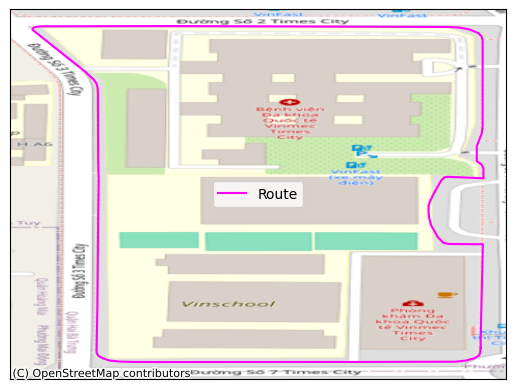

In [17]:
route_df = get_gpx_df(input_dir + '/route.gpx')
plot_map(route_df, 'magenta', 'Route')

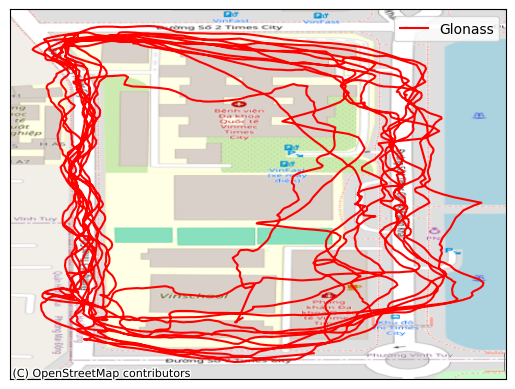

In [18]:
plot_map(glonass_df, 'red', 'Glonass')

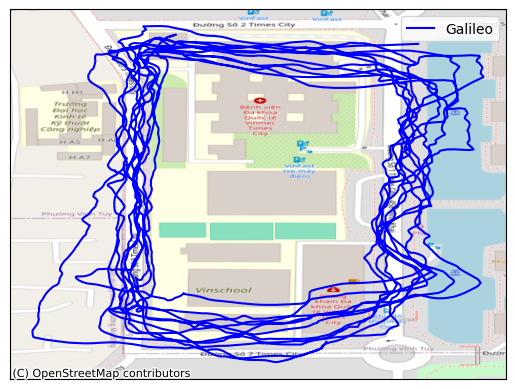

In [19]:
plot_map(galileo_df, 'blue', 'Galileo')

In [20]:
desc_glonass_df = glonass_df['distance_to_route'].describe().to_frame()
desc_glonass_df.columns = ['Glonass']

desc_galileo_df = galileo_df['distance_to_route'].describe().to_frame()
desc_galileo_df.columns = ['Galileo']

merged_desc = pd.concat([desc_glonass_df, desc_galileo_df], axis=1)
merged_desc.to_csv('/tmp/merged_desc.csv')

print(merged_desc)

           Glonass      Galileo
count  3713.000000  3692.000000
mean     16.002708    19.498791
std      13.729468    15.344603
min       0.001369     0.012103
25%       6.197156     7.001671
50%      12.041425    16.315116
75%      22.108045    28.340166
max      76.839131    76.332005
